In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib
plt.rcParams.update({
                     "axes.spines.right" : False,
                     "axes.spines.top" : False,
                     "font.size": 15,
                     "savefig.dpi": 400,
                     "savefig.bbox": 'tight',
                     'text.latex.preamble': r'\usepackage{amsfonts}'
                    }
                   )

### Load all x and y values 

In [2]:
folder_name = '../data_peakwv_SPHERE/'
metric_name = 'peakwv_SPHERE'
iteration = 8
for i in range(1,iteration):
    s_array = np.load(folder_name + str(i) + '/spectra.npy')
    obj = np.load(folder_name + str(i) + '/new_obj.npy')
    if i == 1:
        s_array_all = s_array
        obj_all = obj
    else:
        s_array_all = np.vstack((s_array_all, s_array))
        obj_all = np.vstack((obj_all, obj))
all_spectra = s_array_all

In [3]:
all_x = np.load(folder_name + str(iteration-1) + '/train_x.npy') #All x_values from 0th iteration to iteration-1 

In [4]:
array = np.hstack((obj_all, all_x, all_spectra))

In [5]:
sorted_array = array[np.argsort(array[:, 0])]

### Find the best sample in each iteration 

In [6]:
best_score = []
wavelength = np.load(folder_name + '1/wavelengths.npy')
for i in range(1,iteration):
    s_array = np.load(folder_name + str(i) + '/spectra.npy')
    obj = np.load(folder_name + str(i) + '/new_obj.npy')
    x = np.load(folder_name + str(i) + '/new_x.npy')
    array = np.hstack((obj, x, s_array))
    sorted_array = array[np.argsort(array[:, 0])]
    best_x = sorted_array[-1,1:3]
    best_y = sorted_array[-1,3:]
    best_score.append(sorted_array[-1,0])
    if i == 1:
        all_best_x = best_x
        all_best_y = best_y
    else:
        all_best_x = np.vstack((all_best_x, best_x))
        all_best_y = np.vstack((all_best_y, best_y))

### Plot data 

In [7]:
target = pd.read_excel('Target_SPHERE.xlsx')
target = np.asarray(target)
target_spectra = target[:,1].reshape(-1,1)

In [8]:
#target = pd.read_excel('Target_ROD.xlsx')
#target = target['B8'].values.reshape(-1,1)

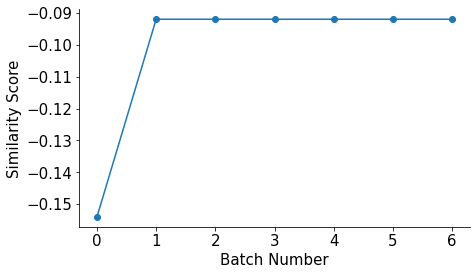

In [9]:
cumulative_best = [best_score[0]]
for i in range(1, len(best_score)):
    if best_score[i] > best_score[i-1]:
        cumulative_best.append(best_score[i])
    else:
        cumulative_best.append(cumulative_best[i-1])
itr = np.linspace(0,iteration -2, iteration -1)
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(itr, cumulative_best, '-o')
plt.xlabel('Batch Number', fontsize = 15)
plt.ylabel('Similarity Score', fontsize = 15)
plt.savefig('../figures/' + metric_name + 'cumulative_best.png')